In [44]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os, sys
import mpl_scatter_density
import mplhep as hep
import matplotlib
import mpl_scatter_density

sys.path.append('../')
from utils import load
import model.data_loader as data_loader
from tqdm import tqdm
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
epoch = 99

In [3]:
prefix = '/export/home/phys/kyungmip/L1DeepMETv2/'

ckpts = f'{prefix}/ckpts_Feb25_norm_momentum_binned_response_lr_0p1/'

In [6]:
pdg = {'muon': [], \
       'electron': [], \
       'photon': [], \
       'kaon': [], \
       'pion': [], \
       #'up': [], \
       #'down': []
      }

for id in pdg.keys():
    file = glob.glob(f'{ckpts}/epoch{epoch}_{id}_weights.*')[0]
    pdg[id] = np.loadtxt(file, delimiter=',')

In [37]:
pre_fix = '/export/home/phys/kyungmip/L1DeepMETv2/'

data_dir = pre_fix + 'data_ttbar/'        # name of the input data folder

batch_size = 32

dataloaders = data_loader.fetch_dataloader(data_dir = data_dir, batch_size=int(batch_size), validation_split=.2)

train_dl = dataloaders['train']
test_dl = dataloaders['test']

print('Training dataloader: {}, Test dataloader: {}'.format(len(train_dl), len(test_dl)))

Split: 199708
length of train/val data:  798834 199708
Training dataloader: 24964, Test dataloader: 6241


/export/home/phys/kyungmip/anaconda3/lib/python3.8/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [49]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [60]:
with tqdm(total=len(test_dl)) as t:
    for data in test_dl:
        print(data.x[:,5][torch.abs(data.x[:,6]) == 11])
        weights = {
            'electron': data.x[:,5][torch.abs(data.x[:,6]) == 11].numpy(),
            'muon': data.x[:,5][torch.abs(data.x[:,6]) == 13].numpy(),
            'photon': data.x[:,5][torch.abs(data.x[:,6]) == 22].numpy(),
            'kaon': data.x[:,5][torch.abs(data.x[:,6]) == 130].numpy(),
            'pion': data.x[:,5][torch.abs(data.x[:,6]) == 211].numpy(),
        }

In [62]:
weights['electron']

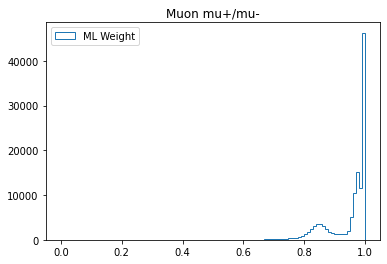

In [34]:
particle = 'muon'

bins = np.linspace(0, 1, 100)

plt.hist(pdg[particle], bins, histtype='step', label='ML Weight')

plt.title('Muon mu+/mu-')

plt.legend()

plt.show()

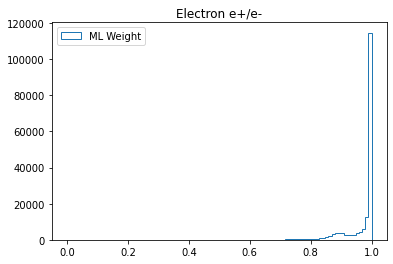

In [29]:
particle = 'electron'

bins = np.linspace(0, 1, 100)

plt.hist(pdg[particle], bins, histtype='step', label='ML Weight')

plt.title('Electron e+/e-')

plt.legend()

plt.show()

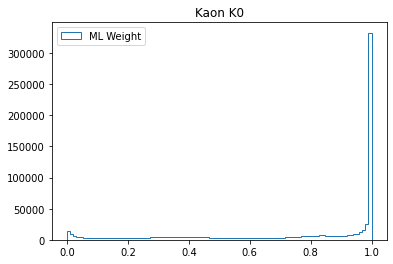

In [30]:
particle = 'kaon'

bins = np.linspace(0, 1, 100)

plt.hist(pdg[particle], bins, histtype='step', label='ML Weight')

plt.title('Kaon K0')

plt.legend()

plt.show()

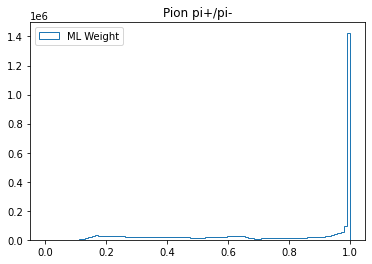

In [32]:
particle = 'pion'

bins = np.linspace(0, 1, 100)

plt.hist(pdg[particle], bins, histtype='step', label='ML Weight')

plt.title('Pion pi+/pi-')

plt.legend()

plt.show()

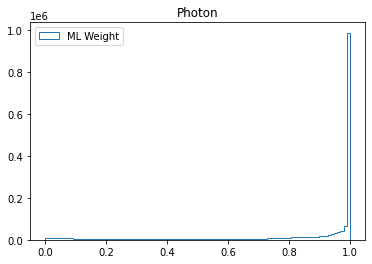

In [33]:
particle = 'photon'

bins = np.linspace(0, 1, 100)

plt.hist(pdg[particle], bins, histtype='step', label='ML Weight')

plt.title('Photon')

plt.legend()

plt.show()